# Customer Churn Analysis

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
dataset = pd.read_csv('churn_modelling.csv')
a = dataset.iloc[:, 3:13]
b = dataset.iloc[:, 13]

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
cols = ['Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']

In [10]:
dataset = dataset[cols]

### Exploratory Data Analysis

In [11]:
dataset["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
# Encoding categorical data
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_X_1 = LabelEncoder()
#X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
#labelencoder_X_2 = LabelEncoder()
#X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
#onehotencoder = OneHotEncoder()
#X = onehotencoder.fit_transform(X).toarray()
#X = X[:, 1:]

In [13]:
# convert categorical feature into dummy variables
geography_dummies=pd.get_dummies(dataset["Geography"],drop_first=True)
gender_dummies=pd.get_dummies(dataset["Gender"],drop_first=True)

In [14]:
dataset= dataset[['Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

In [15]:
dataset.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
#concatenate the remaining dummies columns
new_dataset=pd.concat([dataset,geography_dummies,gender_dummies],axis=1)

In [17]:
new_dataset.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [18]:
new_dataset.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
#drop the columns as it is no longer required

new_dataset=new_dataset.drop(['Geography','Gender'],axis=1)
new_dataset=new_dataset.drop(['Surname'],axis=1)

In [20]:
new_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [21]:
new_dataset.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Germany            0
Spain              0
Male               0
dtype: int64

Text(0, 0.5, 'Count')

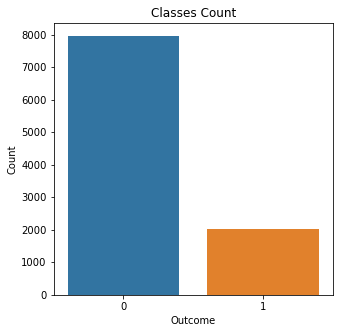

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(dataset["Exited"])
plt.title("Classes Count")
plt.xlabel("Outcome")
plt.ylabel("Count")

Text(0.5, 1.0, 'Correlation Heatmap')

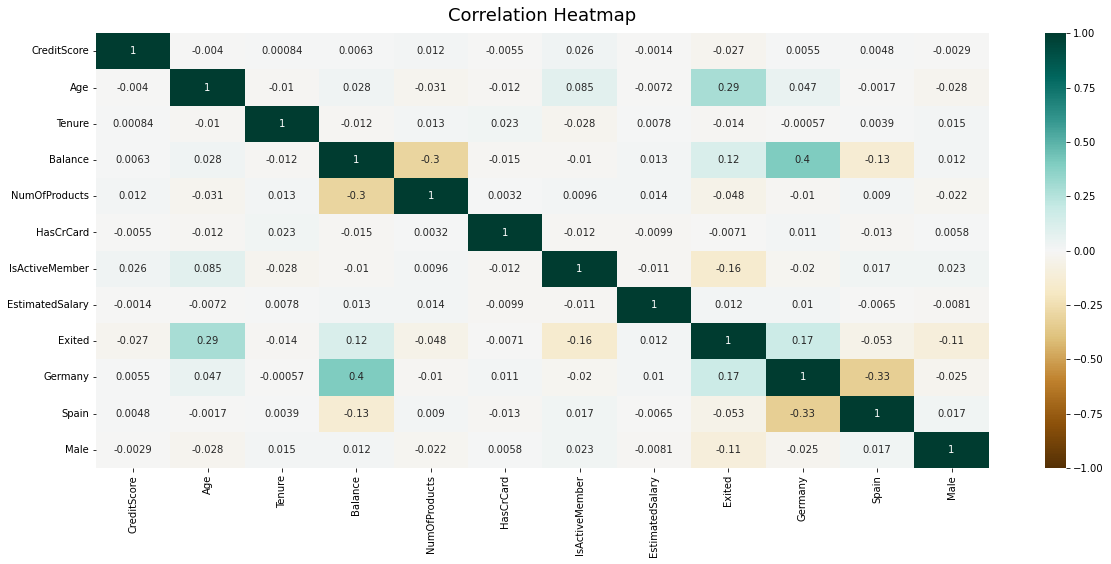

In [23]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(new_dataset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

### Feature Selection

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

In [25]:
X = new_dataset.drop("Exited", axis=1)
y = new_dataset["Exited"]

In [26]:
bestFeatures = SelectKBest(score_func=chi2, k=10)
fit = bestFeatures.fit(X,y)

In [27]:
scores = pd.DataFrame(fit.scores_)
cols = pd.DataFrame(X.columns)

In [28]:
bestFeaturesnew_dataset = pd.concat([cols, scores], axis=1)
bestFeaturesnew_dataset.columns = ['Features', 'Score']
print(bestFeaturesnew_dataset)

           Features         Score
0       CreditScore  1.054035e+02
1               Age  2.300417e+03
2            Tenure  3.270538e+00
3           Balance  7.151303e+06
4     NumOfProducts  5.055394e+00
5         HasCrCard  1.500410e-01
6    IsActiveMember  1.181994e+02
7   EstimatedSalary  4.835088e+04
8           Germany  2.254644e+02
9             Spain  2.086721e+01
10             Male  5.153993e+01


In [29]:
print(bestFeaturesnew_dataset.nlargest(8, "Score"))

           Features         Score
3           Balance  7.151303e+06
7   EstimatedSalary  4.835088e+04
1               Age  2.300417e+03
8           Germany  2.254644e+02
6    IsActiveMember  1.181994e+02
0       CreditScore  1.054035e+02
10             Male  5.153993e+01
9             Spain  2.086721e+01


In [30]:
bestOnes = ['Balance', 'EstimatedSalary', 'Age', 'Germany', 'IsActiveMember', 'CreditScore', 'Male', 'Spain']

In [31]:
new_dataset[bestOnes].describe()

,Balance,EstimatedSalary,Age,Germany,IsActiveMember,CreditScore,Male,Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,76485.889288,100090.239881,38.921800,0.250900,0.515100,650.528800,0.545700,0.247700
std,62397.405202,57510.492818,10.487806,0.433553,0.499797,96.653299,0.497932,0.431698
min,0.000000,11.580000,18.000000,0.000000,0.000000,350.000000,0.000000,0.000000
25%,0.000000,51002.110000,32.000000,0.000000,0.000000,584.000000,0.000000,0.000000
50%,97198.540000,100193.915000,37.000000,0.000000,1.000000,652.000000,1.000000,0.000000
75%,127644.240000,149388.247500,44.000000,1.000000,1.000000,718.000000,1.000000,0.000000
max,250898.090000,199992.480000,92.000000,1.000000,1.000000,850.000000,1.000000,1.000000


In [32]:
X = new_dataset[bestOnes]
y = new_dataset["Exited"]

In [33]:
print(X.shape, y.shape)

(10000, 8) (10000,)


In [34]:
X.head()

,Balance,EstimatedSalary,Age,Germany,IsActiveMember,CreditScore,Male,Spain
0,0.00,101348.88,42,0,1,619,0,0
1,83807.86,112542.58,41,0,1,608,0,1
2,159660.80,113931.57,42,0,0,502,0,0
3,0.00,93826.63,39,0,0,699,0,0
4,125510.82,79084.10,43,0,1,850,0,1


### Working on the Imbalanced Data

In [35]:
yes_exited = new_dataset[new_dataset["Exited"] == 1]
no_exited = new_dataset[new_dataset["Exited"] == 0]

In [36]:
print(yes_exited.shape, no_exited.shape)

(2037, 12) (7963, 12)


In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
from imblearn.combine import SMOTETomek 

In [39]:
from collections import Counter

In [40]:
sm = SMOTE(random_state=123)

In [41]:
X_res, y_res = sm.fit_resample(X, y)

In [42]:
print(X_res.shape, y_res.shape)

(15926, 8) (15926,)


In [43]:
print("Original dataset shape {}".format(Counter(y)))
print("Resampled dataset shape {}".format(Counter(y_res)))

Original dataset shape Counter({0: 7963, 1: 2037})
Resampled dataset shape Counter({1: 7963, 0: 7963})


In [44]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [45]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
X_train.shape

(8000, 8)

In [48]:
X_test.shape

(2000, 8)

In [49]:
X_train[:10]

array([[-1.21571749,  1.10643166, -0.46460796, -0.5698444 , -1.03227043,
         0.16958176, -1.09168714,  1.74309049],
       [-0.00631193, -0.74866447,  0.30102557,  1.75486502,  0.9687384 ,
        -2.30455945,  0.91601335, -0.57369368],
       [ 0.57993469,  1.48533467, -0.94312892, -0.5698444 , -1.03227043,
        -1.19119591, -1.09168714, -0.57369368],
       [ 0.47312769,  1.27652776,  0.10961719, -0.5698444 , -1.03227043,
         0.03556578,  0.91601335,  1.74309049],
       [ 0.8101927 ,  0.55837842,  1.73658844, -0.5698444 ,  0.9687384 ,
         2.05611444, -1.09168714,  1.74309049],
       [ 0.44253504,  1.63252134, -0.17749539,  1.75486502, -1.03227043,
         1.29325423, -1.09168714, -0.57369368],
       [ 0.30432823,  0.48149647,  0.77954653, -0.5698444 , -1.03227043,
         1.6128308 ,  0.91601335, -0.57369368],
       [-1.21571749,  1.07382167,  0.20532138, -0.5698444 ,  0.9687384 ,
        -0.54173384,  0.91601335,  1.74309049],
       [ 0.80633029, -1.04949755

### Building Model

In [50]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [51]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_shape=(8, ), units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [52]:
classifier.compile(loss='binary_crossentropy', 
                     optimizer='adam',
                     metrics=['accuracy'])

In [53]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 54        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Fitting the ANN to the Training set
classifier.fit(x=X_train, y=y_train, batch_size = 10,epochs=200)

Epoch 1/200
800/800 [==============================] - 1s 1ms/step - loss: 0.4917 - accuracy: 0.7952
Epoch 2/200
800/800 [==============================] - 1s 1ms/step - loss: 0.4274 - accuracy: 0.7960
Epoch 3/200
800/800 [==============================] - 1s 988us/step - loss: 0.4207 - accuracy: 0.8121
Epoch 4/200
800/800 [==============================] - 1s 975us/step - loss: 0.4140 - accuracy: 0.8282
Epoch 5/200
800/800 [==============================] - 1s 921us/step - loss: 0.4097 - accuracy: 0.8324
Epoch 6/200
800/800 [==============================] - 1s 1ms/step - loss: 0.4064 - accuracy: 0.8340
Epoch 7/200
800/800 [==============================] - 1s 1ms/step - loss: 0.4041 - accuracy: 0.8340
Epoch 8/200
800/800 [==============================] - 1s 914us/step - loss: 0.4024 - accuracy: 0.8315
Epoch 9/200
800/800 [==============================] - 1s 995us/step - loss: 0.4010 - accuracy: 0.8334
Epoch 10/200
800/800 [==============================] - 1s 911us/step - loss: 0.4

800/800 [==============================] - 1s 787us/step - loss: 0.3938 - accuracy: 0.8346
Epoch 81/200
800/800 [==============================] - 1s 927us/step - loss: 0.3945 - accuracy: 0.8350
Epoch 82/200
800/800 [==============================] - 1s 798us/step - loss: 0.3944 - accuracy: 0.8317
Epoch 83/200
800/800 [==============================] - 1s 816us/step - loss: 0.3940 - accuracy: 0.8340
Epoch 84/200
800/800 [==============================] - 1s 736us/step - loss: 0.3942 - accuracy: 0.8361
Epoch 85/200
800/800 [==============================] - 1s 783us/step - loss: 0.3943 - accuracy: 0.8351
Epoch 86/200
800/800 [==============================] - 1s 746us/step - loss: 0.3943 - accuracy: 0.8322
Epoch 87/200
800/800 [==============================] - 1s 752us/step - loss: 0.3946 - accuracy: 0.8329
Epoch 88/200
800/800 [==============================] - 1s 2ms/step - loss: 0.3944 - accuracy: 0.8338
Epoch 89/200
800/800 [==============================] - 1s 1ms/step - loss: 0.3

800/800 [==============================] - 1s 787us/step - loss: 0.3941 - accuracy: 0.8349
Epoch 160/200
800/800 [==============================] - 1s 766us/step - loss: 0.3941 - accuracy: 0.8328
Epoch 161/200
800/800 [==============================] - 1s 724us/step - loss: 0.3940 - accuracy: 0.8346
Epoch 162/200
800/800 [==============================] - 1s 802us/step - loss: 0.3941 - accuracy: 0.8336
Epoch 163/200
800/800 [==============================] - 1s 701us/step - loss: 0.3940 - accuracy: 0.8342
Epoch 164/200
800/800 [==============================] - 1s 709us/step - loss: 0.3940 - accuracy: 0.8354
Epoch 165/200
800/800 [==============================] - 1s 767us/step - loss: 0.3937 - accuracy: 0.8329
Epoch 166/200
800/800 [==============================] - 1s 894us/step - loss: 0.3928 - accuracy: 0.8345
Epoch 167/200
800/800 [==============================] - 1s 740us/step - loss: 0.3939 - accuracy: 0.8339
Epoch 168/200
800/800 [==============================] - 1s 701us/ste

In [55]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
yp = classifier.predict(X_test)
print("The predicted values on test set are as follows:- \n")
print(yp)
yp[:5]

The predicted values on test set are as follows:- 

[[0.23583397]
 [0.26378486]
 [0.23254812]
 ...
 [0.16398144]
 [0.10208747]
 [0.13627538]]


array([[0.23583397],
       [0.26378486],
       [0.23254812],
       [0.063274  ],
       [0.18977803]], dtype=float32)

In [56]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [57]:
y_pred[:10]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

In [58]:
y_test[:10]

9394    0
898     1
2398    0
5906    0
2343    0
8225    1
5506    0
6451    0
2670    1
3497    1
Name: Exited, dtype: int64

Our model is working perfectly

In [59]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)
print("The confusion matrix to test the performance of the network on test set are as follows:- \n")
print(cm)
print(accuracy)

The confusion matrix to test the performance of the network on test set are as follows:- 

[[1522   73]
 [ 242  163]]
0.8425


### Testing

In [60]:
customer = [60000 ,22000 , 34 , 0 , 1, 1, 650, 1]
customer = np.array([customer])
sc.fit_transform(customer)

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [61]:
pred = classifier.predict(customer)
 
if pred[0] == 1:
  print('customer will leave')
else:
  print('Faithful customer')

Faithful customer


In [62]:
pred

array([[0.]], dtype=float32)

### Saving the best model

In [63]:
Keras_file = "churn_analysis_predictor.h5"

In [64]:
tf.keras.models.save_model(classifier, Keras_file)

In [65]:
classifier = tf.keras.models.load_model('churn_analysis_predictor.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(classifier)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\nehak\AppData\Local\Temp\tmp5rf1u_1q\assets


2216